In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime

def plot_times(pf):
    samples = dict()
    epoch = datetime.strptime("0:0:0", "%H:%M:%S")
    for s in ["cvc4", "mathsat", "yices", "z3"]:
        samples[s] = list()
        with open(pf + ".out_" + s, "r") as f:
            for line in f:
                fields = line.split()
                dt = datetime.strptime(fields[0], "%H:%M:%S")
                hrs = (dt.timestamp() - epoch.timestamp()) / 3600
                samples[s].append((int(fields[1]), hrs))

    plt.figure(figsize=(15, 4))
    for i, t in enumerate([1, 4]):
        plt.subplot(1, 2, i+1)
        for s in ["cvc4", "mathsat", "yices", "z3"]:
            B = [b for a,b in samples[s] if b < t]
            A = [a for a,b in samples[s] if b < t]
            plt.plot(B, A, '-', label=s)
        plt.ylabel("Solved (check-sat)")
        plt.xlabel("Hours runtime")
        plt.title("Solver performance on '%s' for the first %d hour%s" % (pf, t, "s" if t > 1 else ""))
        if t == 1: plt.legend(loc='lower right')

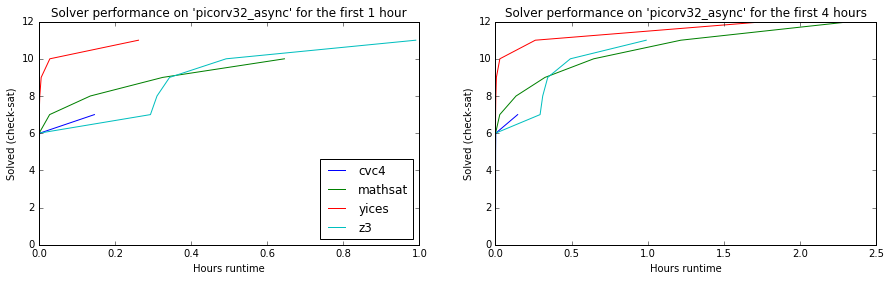

In [2]:
plot_times("picorv32_async")

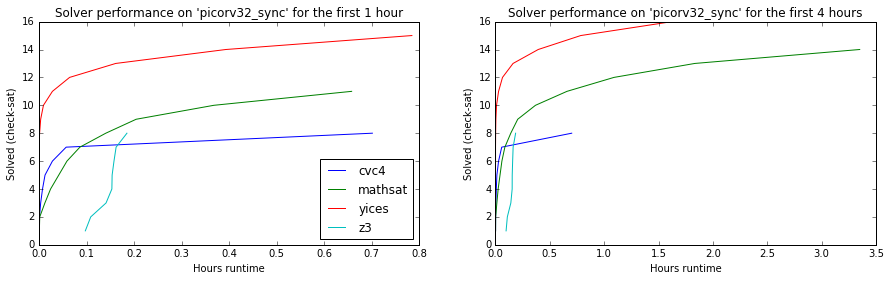

In [3]:
plot_times("picorv32_sync")

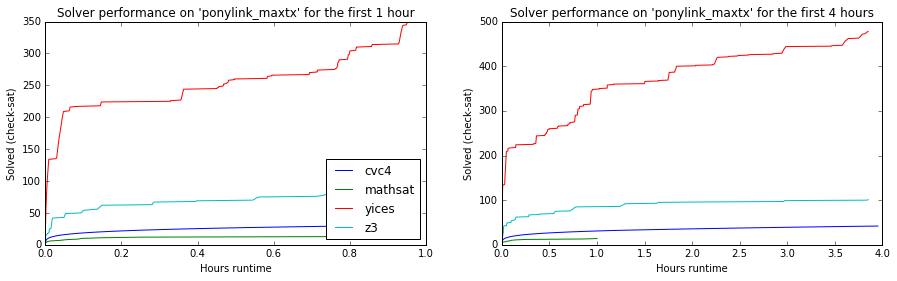

In [4]:
plot_times("ponylink_maxtx")